<a href="https://colab.research.google.com/github/leopoldtech/autoselect/blob/main/Color_Identification_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline


In [44]:
IMAGE_DIRECTORY = 'images'
COLORS = {
    'SCHWARZ': [0, 0, 0],
    'WEISS': [255, 255, 255],
    'ROT': [255, 0, 0],
    'GRÜN': [0, 128, 0],
    'BLAU': [0, 0, 128],
    'GELB': [255, 255, 0]
    


}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

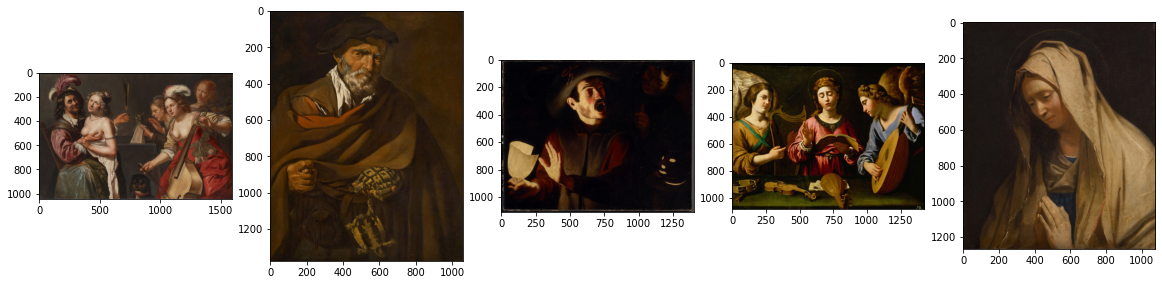

In [45]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [46]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [47]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

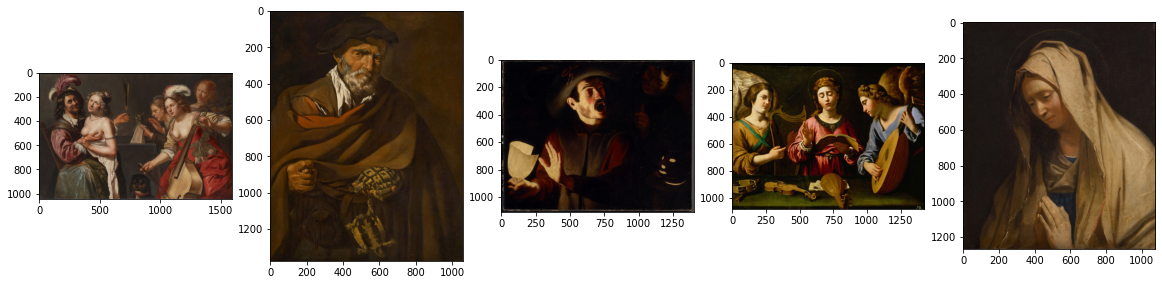

In [48]:
# USER SUCHT NACH SCHWARZ ("Searching for images with color: black")
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['SCHWARZ'], 60, 5)

In [26]:
# USER SUCHT NACH GRÜN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GRÜN'], 60, 5)

<Figure size 1440x720 with 0 Axes>

In [14]:
# USER SUCHT NACH BLAU
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLAU'], 60, 5)

<Figure size 1440x720 with 0 Axes>

In [15]:
# USER SUCHT NACH GELB
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GELB'], 60, 5)

<Figure size 1440x720 with 0 Axes>